In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import scipy.stats as stats
%matplotlib inline

In [2]:
pwd

'C:\\Users\\piichan\\Documents\\Berkeley\\CoCoSci Lab\\mcrl\\mcrl\\python'

In [3]:
cd ../experiments/data/human/1.7

C:\Users\piichan\Documents\Berkeley\CoCoSci Lab\mcrl\mcrl\experiments\data\human\1.7


In [4]:
df=pd.read_csv('survey-text.csv', sep=',')
df.head()

,p_rdata,action_times,actions,beliefs,correct,delays,information_used_correctly,key_press,meta_actions,path,...,questions,responses,rt,score,time_elapsed,trial_index,trial_id,trial_type,view_history,pid
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{""Q0"":""I determined which ending had the most ...",67712,NaN,1018683,NaN,NaN,survey-text,NaN,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{""Q0"":""Looking for the most green trails. Stay...",68585,NaN,1220954,NaN,NaN,survey-text,NaN,1
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{""Q0"":""In L-shaped patterns."",""Q1"":""Due to the...",182928,NaN,1760665,NaN,NaN,survey-text,NaN,4
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{""Q0"":""I Mainly just started with the four cen...",123040,NaN,1236383,NaN,NaN,survey-text,NaN,5
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,"{""Q0"":""Choosing just a few points and finding ...",104871,NaN,1246608,NaN,NaN,survey-text,NaN,6


In [5]:
df['responses']

0      {"Q0":"I determined which ending had the most ...
1      {"Q0":"Looking for the most green trails. Stay...
2      {"Q0":"In L-shaped patterns.","Q1":"Due to the...
3      {"Q0":"I Mainly just started with the four cen...
4      {"Q0":"Choosing just a few points and finding ...
5      {"Q0":"I chose routes with most money","Q1":"I...
6      {"Q0":"I planned as a circle and when it didn'...
7      {"Q0":"Clicked a couple times to see if there ...
8      {"Q0":"I clicked all the first stops first. Fr...
9      {"Q0":"check value of the 4 directions you can...
10     {"Q0":"I looked at the first circle amount the...
11     {"Q0":"At first I didn't have a good strategy....
12     {"Q0":"Assessing the net gain for each route",...
13     {"Q0":"I didn't plan. I went with gut instinct...
14     {"Q0":"First, I selected the first four paths....
15     {"Q0":"I looked at the values for the end deci...
16     {"Q0":"I checked the circumference first and t...
17     {"Q0":"By the amount of 

## Age Distribution

In [6]:
ages = []
ages_for_table = [] #....or I could use regex on the dataframe to get the ages but not right now
for response in df['responses']:
    elements = response.split('"')
    if elements[11] == 'Q2':
        age = elements[13]
    else:
        age = elements[11]
    if age == '':
        ages_for_table.append(np.nan)
        continue
    age = int(age)
    ages.append(age)
    ages_for_table.append(age)

np.sort(ages)

array([19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22, 22,
       22, 22, 22, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 23,
       23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 24, 24, 24, 24,
       24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25, 25,
       25, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26,
       26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27,
       27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28,
       28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29,
       29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30,
       30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30,
       30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31,
       31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 32, 32, 32

(array([  5.,   8.,   9.,  20.,  16.,  14.,  14.,  18.,  17.,  21.,  22.,
         25.,  20.,  20.,  12.,  11.,  18.,  16.,  11.,  11.,  14.,  13.,
          9.,   9.,   9.,   4.,   6.,   4.,   6.,   8.,   4.,   9.,   3.,
          4.,   5.,   5.,   8.,   9.,   2.,   1.,   3.,   3.,   4.,   1.,
          1.,   1.,   1.,   2.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
        53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69,
        70, 71, 72, 73]),
 <a list of 54 Patch objects>)

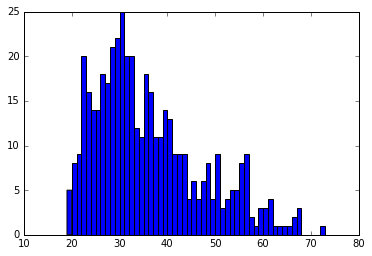

In [7]:
plt.figure()
plt.hist(ages, bins=np.arange(np.min(ages), np.max(ages)+1))

## Verbal Strategy Analysis

In [8]:
df['pid']

0        0
1        1
2        4
3        5
4        6
5        7
6        9
7       10
8       11
9       12
10      13
11      15
12      16
13      17
14      18
15      19
16      20
17      21
18      23
19      24
20      25
21      26
22      27
23      28
24      29
25      30
26      31
27      33
28      34
29      35
      ... 
433    498
434    499
435    500
436    501
437    502
438    503
439    504
440    505
441    506
442    507
443    508
444    509
445    511
446    512
447    514
448    515
449    516
450    517
451    518
452    519
453    520
454    521
455    522
456    523
457    524
458    525
459    526
460    527
461    528
462    530
Name: pid, Length: 463, dtype: int64

In [9]:
responses0 = df['responses']
strategies = []
pids = []
# Grabs the text responses to the question "What was your planning strategy?"
for i in np.arange(responses0.size):
    response = responses0[i]
    pid = int(df['pid'][i])
    pids.append(pid)
    elements = response.split('","')
    text = elements[0][7:]
    strategies.append(text)

strat = pd.DataFrame(pids, columns=['pid'])
strat['Verbal Report'] = strategies
strat

,pid,Verbal Report
0,0,I determined which ending had the most to offe...
1,1,Looking for the most green trails. Stayed away...
2,4,In L-shaped patterns.
3,5,I Mainly just started with the four center cir...
4,6,Choosing just a few points and finding what I ...
5,7,I chose routes with most money
6,9,I planned as a circle and when it didn't work ...
7,10,Clicked a couple times to see if there were an...
8,11,I clicked all the first stops first. From ther...
9,12,"check value of the 4 directions you can go, ch..."


In [10]:
trialsdf=pd.read_csv('trials.csv', sep=',')
trialsdf = trialsdf[['pid','info_cost','PR_type','score']]
trialsdf

,pid,info_cost,PR_type,score
0,0,0.10,none,27.40
1,0,0.10,none,35.60
2,0,0.10,none,27.20
3,0,0.10,none,34.90
4,0,0.10,none,18.80
5,0,0.10,none,43.70
6,0,0.10,none,10.40
7,0,0.10,none,18.90
8,0,0.10,none,27.10
9,0,0.10,none,35.10


In [11]:
means = trialsdf.groupby('pid').mean()
means.reset_index(level=0, inplace=True)
means['cat_score'] = np.zeros(means.shape[0],dtype=int)
means['cat_cost'] = np.zeros(means.shape[0],dtype=int)

In [12]:
means

,pid,info_cost,score,cat_score,cat_cost
0,0,0.10,20.443750,0,0
1,1,1.25,9.703125,0,0
2,4,4.00,-3.000000,0,0
3,5,0.10,24.025000,0,0
4,6,1.25,13.046875,0,0
5,7,1.25,5.578125,0,0
6,9,1.25,10.687500,0,0
7,10,4.00,-7.250000,0,0
8,11,0.10,17.956250,0,0
9,12,1.25,10.718750,0,0


In [13]:
costs = np.array([0.10000000000000002,1.25,4])
cost_str = ["low","med","high"]
for i in range(3):
    cost = costs[i]
    means.loc[means['info_cost'] == cost,'cat_score'] = pd.qcut(means[means['info_cost'] == cost]['score'],3,["low","med","high"])
    means.loc[means['info_cost'] == cost,'cat_cost'] = cost_str[i]

In [14]:
means

,pid,info_cost,score,cat_score,cat_cost
0,0,0.10,20.443750,med,low
1,1,1.25,9.703125,med,med
2,4,4.00,-3.000000,low,high
3,5,0.10,24.025000,high,low
4,6,1.25,13.046875,high,med
5,7,1.25,5.578125,low,med
6,9,1.25,10.687500,med,med
7,10,4.00,-7.250000,low,high
8,11,0.10,17.956250,low,low
9,12,1.25,10.718750,med,med


In [15]:
means_cat = means[['pid','cat_score','cat_cost']]

In [16]:
means_cat

,pid,cat_score,cat_cost
0,0,med,low
1,1,med,med
2,4,low,high
3,5,high,low
4,6,high,med
5,7,low,med
6,9,med,med
7,10,low,high
8,11,low,low
9,12,med,med


In [17]:
final = strat.merge(means_cat,on='pid')

In [18]:
final = pd.get_dummies(final,columns=['cat_score','cat_cost'])

In [19]:
final

,pid,Verbal Report,cat_score_high,cat_score_low,cat_score_med,cat_cost_high,cat_cost_low,cat_cost_med
0,0,I determined which ending had the most to offe...,0,0,1,0,1,0
1,1,Looking for the most green trails. Stayed away...,0,0,1,0,0,1
2,4,In L-shaped patterns.,0,1,0,1,0,0
3,5,I Mainly just started with the four center cir...,1,0,0,0,1,0
4,6,Choosing just a few points and finding what I ...,1,0,0,0,0,1
5,7,I chose routes with most money,0,1,0,0,0,1
6,9,I planned as a circle and when it didn't work ...,0,0,1,0,0,1
7,10,Clicked a couple times to see if there were an...,0,1,0,1,0,0
8,11,I clicked all the first stops first. From ther...,0,1,0,0,1,0
9,12,"check value of the 4 directions you can go, ch...",0,0,1,0,0,1


In [20]:
#final.to_csv(path_or_buf='final.csv', sep="\t",index=False)

## Age and Score Analysis

In [24]:
age_score = pd.DataFrame(trialsdf.groupby(['pid', 'PR_type']).mean())
age_score['age'] = ages_for_table
age_score = age_score.dropna(axis=0, how='any')
age_score = age_score.reset_index()
age_score = age_score.set_index('pid')

In [25]:
age_score

,PR_type,info_cost,score,age
pid,,,,
0,none,0.10,20.443750,20.0
1,featureBased,1.25,9.703125,47.0
4,none,4.00,-3.000000,25.0
5,none,0.10,24.025000,24.0
6,objectLevel,1.25,13.046875,50.0
7,objectLevel,1.25,5.578125,41.0
9,featureBased,1.25,10.687500,50.0
10,objectLevel,4.00,-7.250000,33.0
11,featureBased,0.10,17.956250,34.0


In [42]:
data = pd.read_csv('trials.csv', sep=',')
data = data[['pid', 'info_cost','PR_type', 'trial_index', 'score']]
training = data[data['trial_index'] < 11]
age_score['first_five'] = training[training['trial_index'] < 6].groupby('pid')['score'].mean()
age_score['last_five'] = training[training['trial_index'] > 5].groupby('pid')['score'].mean()
age_score['improvement'] = age_score['last_five'] - age_score['first_five']

In [47]:
med_cost_scores = age_score[(age_score['info_cost']==1.25) & (age_score['PR_type']=='featureBased')]
med_cost_scores

,PR_type,info_cost,score,age,first_five,last_five,improvement
pid,,,,,,,
1,featureBased,1.25,9.703125,47.0,-1.45,14.10,15.55
9,featureBased,1.25,10.687500,50.0,4.45,21.75,17.30
12,featureBased,1.25,10.718750,33.0,21.95,8.75,-13.20
13,featureBased,1.25,12.750000,27.0,13.35,5.05,-8.30
15,featureBased,1.25,11.250000,48.0,14.40,11.60,-2.80
18,featureBased,1.25,7.859375,20.0,-7.00,15.40,22.40
90,featureBased,1.25,11.500000,33.0,6.90,10.55,3.65
98,featureBased,1.25,6.640625,56.0,3.95,11.20,7.25
101,featureBased,1.25,13.718750,53.0,11.85,18.00,6.15


Pearson:  (-0.091459241979023637, 0.51902874589479209)
SpearmanrResult(correlation=0.048063806005701787, pvalue=0.73508938946118474)


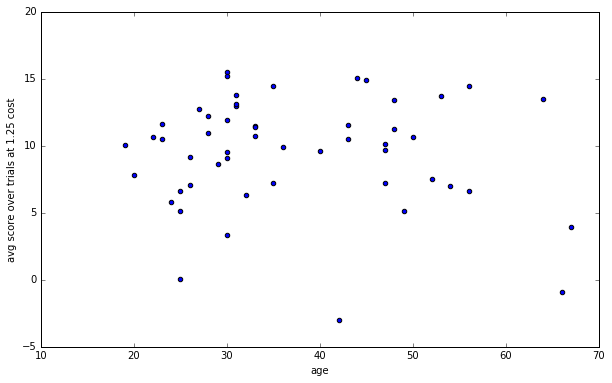

In [48]:
plt.figure(figsize=(10, 6))
plt.scatter(med_cost_scores['age'], med_cost_scores['score'])
plt.xlabel('age')
plt.ylabel("avg score over trials at 1.25 cost")
print('Pearson: ', stats.pearsonr(med_cost_scores['age'], med_cost_scores['score']))
print(stats.spearmanr(med_cost_scores['age'], med_cost_scores['score']))

Pearson:  (-0.05491657802892503, 0.69899718783784515)
SpearmanrResult(correlation=-0.1022375900103913, pvalue=0.47077592673910029)


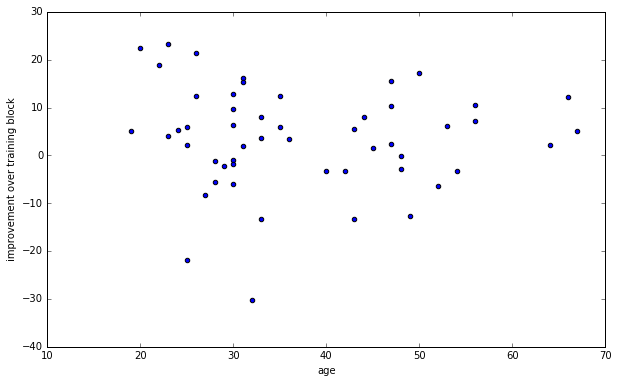

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(med_cost_scores['age'], med_cost_scores['improvement'])
plt.xlabel('age')
plt.ylabel("improvement over training block")
print('Pearson: ', stats.pearsonr(med_cost_scores['age'], med_cost_scores['improvement']))
print(stats.spearmanr(med_cost_scores['age'], med_cost_scores['improvement']))